<a href="https://colab.research.google.com/github/Priyankansd/IT-496/blob/main/psiddap_A11_Criticalpath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import tensorflow_probability as tfp
tfd =tfp.distributions


In [120]:
tasksDf= pd.read_csv("/content/sample_data/PERT-CPM.csv")
taskNames=tasksDf['tasks']

simulationDF=pd.DataFrame(columns=taskNames)

print(simulationDF.columns)
for index,task in tasksDf.iterrows():
  dist=tfd.PERT(low=task['best'], peak=task['mostL'], high=task['worst'], temperature=4)
  simulationDF[task['tasks']]=dist.sample(1000)
print(simulationDF.head(2))



Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'EOP'], dtype='object', name='tasks')
tasks         A         B         C         D         E         F         G  \
0      6.857649  4.148754  3.282894  2.605755  5.888860  2.109402  4.365066   
1      5.622523  4.526079  4.926728  2.555119  7.079595  3.409470  6.617999   

tasks         H          I         J  EOP  
0      4.845081  12.395744  2.802145  NaN  
1      8.026889  17.054993  2.895543  NaN  


In [121]:
paths=['ADEJ','BCDEJ','BCFGJ','BCFHJ','BI']

pathsDF=pd.DataFrame(columns=paths)
ADEJ=[]
BCDEJ=[]
BCFGJ=[]
BCFHJ=[]
BI=[]

for index,row in simulationDF.iterrows():
  ADEJ.append(row['A']+row['D']+row['E']+row['J'])
  BCDEJ.append(row['B']+row['C']+row['D']+row['E']+row['J'])
  BCFGJ.append(row['B']+row['C']+row['F']+row['G']+row['J'])
  BCFHJ.append(row['B']+row['C']+row['F']+row['H']+row['J'])
  BI.append(row['B']+row['I'])

pathsDF['ADEJ']=ADEJ
pathsDF['BCDEJ']=BCDEJ
pathsDF['BCFGJ']=BCFGJ
pathsDF['BCFHJ']=BCFHJ
pathsDF['BI']=BI
print(pathsDF.head(2))

        ADEJ      BCDEJ      BCFGJ      BCFHJ         BI
0  18.154409  18.728407  16.708261  17.188276  16.544498
1  18.152779  21.983063  22.375816  23.784706  21.581072


In [122]:
pathsDF['critical']=pathsDF.idxmax(axis=1)
print(pathsDF)

          ADEJ      BCDEJ      BCFGJ      BCFHJ         BI critical
0    18.154409  18.728407  16.708261  17.188276  16.544498    BCDEJ
1    18.152779  21.983063  22.375816  23.784706  21.581072    BCFHJ
2    19.070288  21.968079  20.165186  18.816954  11.901563    BCDEJ
3    19.296305  20.570721  22.780006  21.817528  16.064213    BCFGJ
4    16.677137  20.565315  18.828892  17.500771  12.834561    BCDEJ
..         ...        ...        ...        ...        ...      ...
995  19.651001  19.473087  21.086651  22.545185  14.173386    BCFHJ
996  15.562834  16.822113  17.581364  15.565085  15.241236    BCFGJ
997  19.789803  20.499950  22.546551  16.152763  14.678258    BCFGJ
998  17.378494  17.493238  17.207788  18.099072  17.034000    BCFHJ
999  20.004900  21.013206  22.537777  17.152580  14.775522    BCFGJ

[1000 rows x 6 columns]


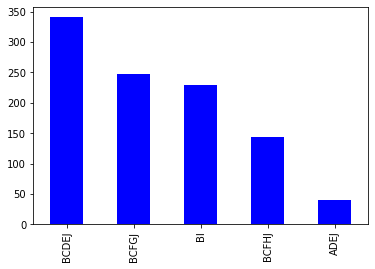

In [123]:
pdDF = pathsDF['critical'].value_counts()
pdDF.plot(kind ='bar', color='blue')
